In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np


In [20]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv", index_col=0,parse_dates=True)
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [21]:
#cleaning the data
df = df[(df["value"]<=df["value"].quantile(0.975)) & (df["value"]>=df["value"].quantile(0.025))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


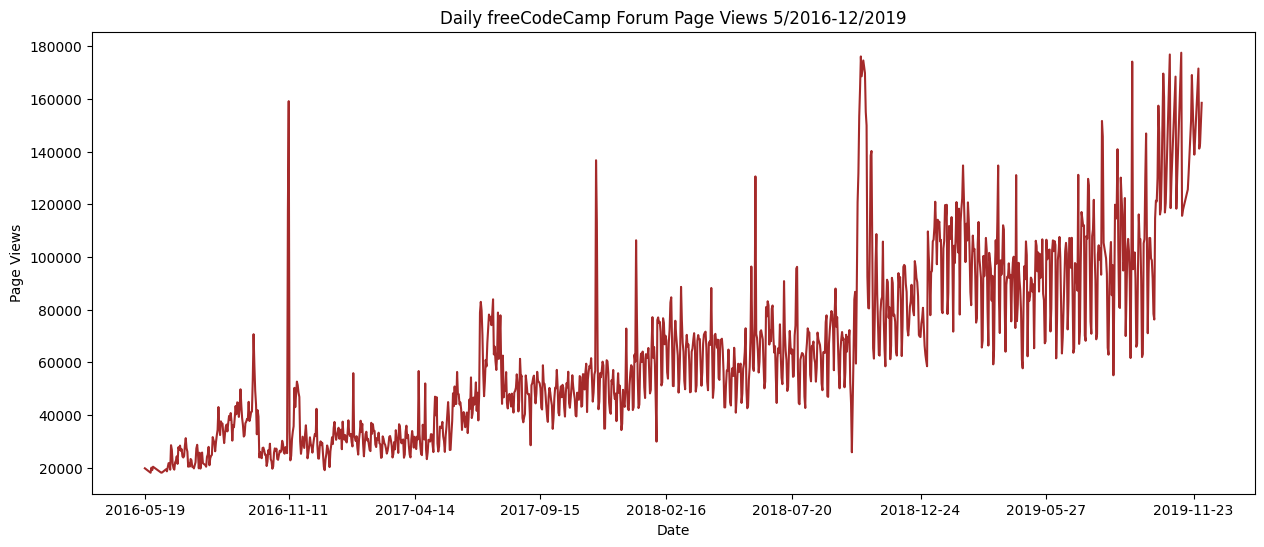

In [22]:
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(df.index, df["value"],  color='brown')
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xticks(df.index[::len(df.index)//8])
fig.savefig('line_plot.png')
# fig

In [23]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['month'] = df.index.strftime('%B')
df_bar['year'] = df.index.year
df_bar = df_bar.groupby(['year','month'])['value'].mean().reset_index(name='mean_views')
palette = {
    'January': 'tab:',
    'On Time': 'tab:green',
    'Overdue': 'tab:orange',
    'Long Overdue': 'tab:red',
}
df_bar

,year,month,mean_views
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571
3,2016,June,21875.105263
4,2016,May,19432.400000
5,2016,November,40448.633333
6,2016,October,27398.322581
7,2016,September,41476.866667
8,2017,April,30878.733333
9,2017,August,47712.451613


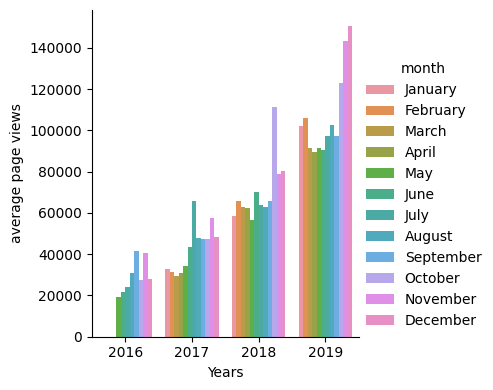

In [24]:
# Draw bar plot

df_bar = sns.catplot(data=df_bar, kind="bar", y="mean_views", x="year",  hue="month", height=4, legend =True, hue_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# # = sns.catplot(data=df_cat, kind="bar", y="total", col="cardio", x="variable", hue="value",  palette="dark", height=4, aspect=1.5 )

fig = df_bar.fig
ax = df_bar.ax
ax.set_xlabel("Years")
ax.set_ylabel("average page views")
# ax.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
# # Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')


In [16]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
# df_year = df_box.groupby("year")["value"].sum().reset_index(name='page_views')

# df_year
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


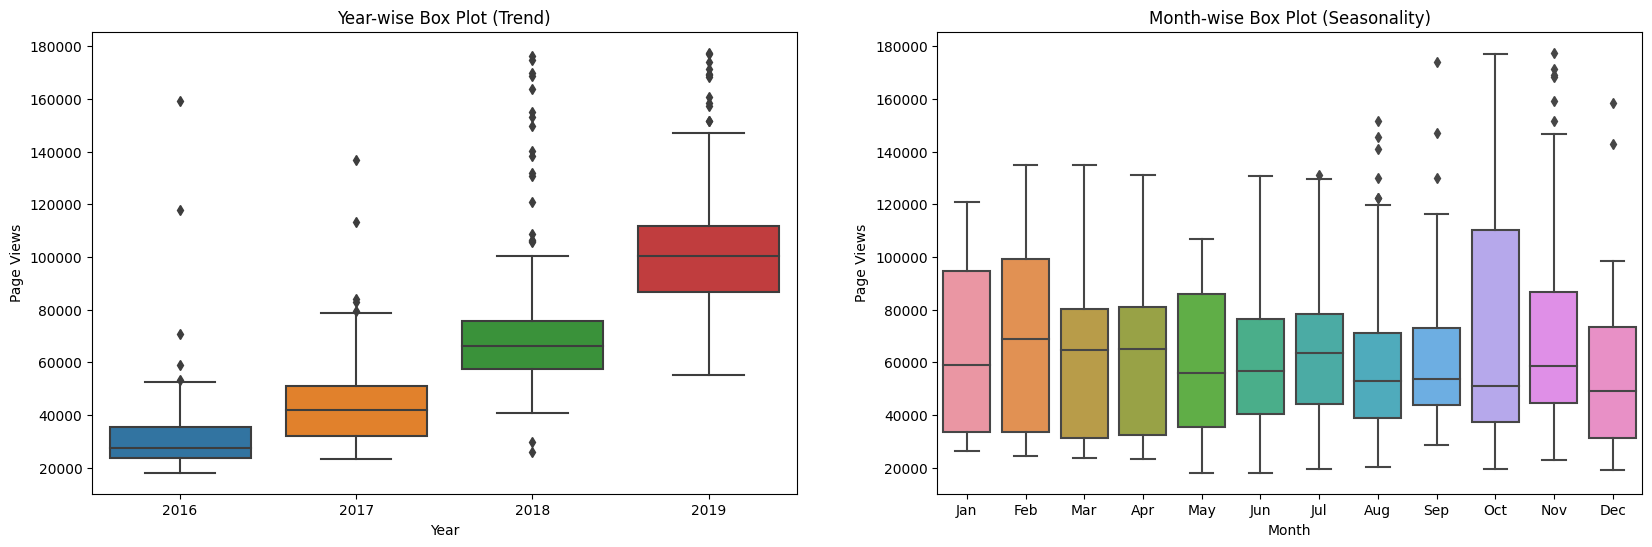

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(data=df_box, x="year", y="value", ax = ax1)
ax1.set_title("Year-wise Box Plot (Trend)")
sns.boxplot(data=df_box, x="month", y="value", ax = ax2, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax1.set_ylabel("Page Views")
ax2.set_ylabel("Page Views")
ax1.set_xlabel("Year")
ax2.set_xlabel("Month")

    # Save image and return fig (don't change this part)
fig.savefig('box_plot.png')